# 第二题

用VGG16进行特征提取，进行cifar-10的分类

In [59]:
# 导入预训练模型VGG16模型的卷积基
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))    ## 指定模型初始化的权重检查点；不包含分类器。ImageNet包括1000个类别，这里只需10类；输入的图像张量形状。

In [60]:
# 数据及准备
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
# 从keras中读取cifar10数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 数据预处理，标准化处理
x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32')/255
# 训练数据划分为训练集和验证集
x_val = x_train[:1000]                        ## 前1000个样本作验证集Validation
partial_x_train = x_train[1000:]              ## 其余样本作训练集

In [61]:
y_train.shape

(50000, 1)

In [62]:
partial_x_train.shape

(49000, 32, 32, 3)

In [63]:
# 提取数据特征：调用卷积基输出函数分别提取训练集、验证集、测试集的特征(samples,4,4,512)，并将其展平为(samples,8192)，后面才能输入全连接层
train_features = np.reshape(conv_base.predict(partial_x_train), (49000, 1 * 1 * 512))
validation_features = np.reshape(conv_base.predict(x_val), (1000, 1 * 1 * 512))
test_features = np.reshape(conv_base.predict(x_test), (10000, 1 * 1 * 512))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [64]:
# 将类别标签转化为独热矩阵表示
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [65]:
# 将类别标签也相应划分为训练集、验证集、测试集
y_val = y_train[:1000]           ## 前1000个验证集样本标签
partial_y_train = y_train[1000:] ## 训练集样本标签
train_labels = partial_y_train
validation_labels = y_val
test_labels = y_test


In [66]:
# 定义全连接分类器
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
##model.add(layers.Flatten(input_shape=conv_base.output_shape[1:]))
model.add(layers.Dense(256, activation='relu', input_dim=1 * 1 * 512))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [67]:
# 编译和训练全连接分类器
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_features, train_labels, epochs=150, batch_size=64, validation_data=(validation_features, validation_labels))
##history = model.fit(train_features, train_labels, epochs=30, batch_size=256, validation_data=(validation_features, validation_labels))

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
739/766 [===========================>..] - ETA: 0s - loss: 2.4462 - accuracy: 0.1236WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1688eaee0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSI

766/766 [==============================] - 1s 739us/step - loss: 1.4723 - accuracy: 0.4896 - val_loss: 1.2614 - val_accuracy: 0.5750
Epoch 45/150
766/766 [==============================] - 1s 761us/step - loss: 1.4807 - accuracy: 0.4873 - val_loss: 1.2610 - val_accuracy: 0.5750
Epoch 46/150
766/766 [==============================] - 1s 752us/step - loss: 1.4847 - accuracy: 0.4857 - val_loss: 1.2603 - val_accuracy: 0.5800
Epoch 47/150
766/766 [==============================] - 1s 752us/step - loss: 1.4718 - accuracy: 0.4864 - val_loss: 1.2601 - val_accuracy: 0.5810
Epoch 48/150
766/766 [==============================] - 1s 747us/step - loss: 1.4626 - accuracy: 0.4929 - val_loss: 1.2578 - val_accuracy: 0.5820
Epoch 49/150
766/766 [==============================] - 1s 753us/step - loss: 1.4680 - accuracy: 0.4912 - val_loss: 1.2542 - val_accuracy: 0.5740
Epoch 50/150
766/766 [==============================] - 1s 742us/step - loss: 1.4732 - accuracy: 0.4911 - val_loss: 1.2530 - val_accuracy

766/766 [==============================] - 1s 765us/step - loss: 1.3872 - accuracy: 0.5223 - val_loss: 1.2180 - val_accuracy: 0.5930
Epoch 101/150
766/766 [==============================] - 1s 764us/step - loss: 1.3805 - accuracy: 0.5208 - val_loss: 1.2167 - val_accuracy: 0.5890
Epoch 102/150
766/766 [==============================] - 1s 746us/step - loss: 1.3952 - accuracy: 0.5133 - val_loss: 1.2159 - val_accuracy: 0.5870
Epoch 103/150
766/766 [==============================] - 1s 752us/step - loss: 1.3912 - accuracy: 0.5167 - val_loss: 1.2154 - val_accuracy: 0.5910
Epoch 104/150
766/766 [==============================] - 1s 770us/step - loss: 1.3876 - accuracy: 0.5164 - val_loss: 1.2178 - val_accuracy: 0.5910
Epoch 105/150
766/766 [==============================] - 1s 756us/step - loss: 1.3841 - accuracy: 0.5218 - val_loss: 1.2167 - val_accuracy: 0.5880
Epoch 106/150
766/766 [==============================] - 1s 761us/step - loss: 1.3788 - accuracy: 0.5175 - val_loss: 1.2147 - val_ac

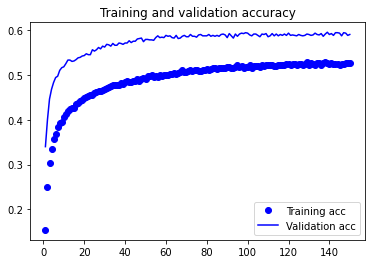

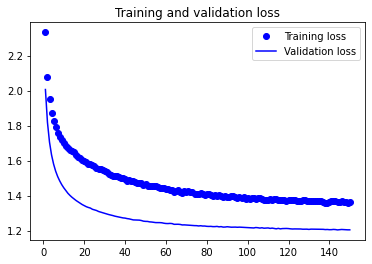

In [68]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [69]:
# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('loss = {}, accuracy = {}'.format(test_loss, test_acc))
# 实验结论
# loss = 1.2414, accuracy = 0.5653   ## epochs=150, batch_size=64

313/313 [==============================] - 0s 271us/step - loss: 1.2414 - accuracy: 0.5653
loss = 1.241441249847412, accuracy = 0.5652999877929688


# 第三题

微调最后一个卷积层，进行cifar-10的分类

In [70]:
# 数据及准备
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# 从keras中读取cifar10数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 数据预处理，标准化处理
x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32')/255
# 训练数据划分为训练集和验证集
x_val = x_train[:1000]                        ## 前1000个样本作验证集Validation
partial_x_train = x_train[1000:]              ## 其余样本作训练集
train_x = partial_x_train
# 将类别标签转化为独热矩阵表示
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 将类别标签也相应划分为训练集、验证集、测试集
y_val = y_train[:1000]           ## 前1000个验证集样本标签
partial_y_train = y_train[1000:] ## 训练集样本标签
train_y = partial_y_train


In [71]:
# 第一次训练
# 定义全连接分类器
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
# 添加卷积基并冻结
model.add(conv_base)
conv_base.trainable = False      ## 卷积基冻结，不参加训练，否则网络参数太多！
# 添加Dense层
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())           ## 查看模型

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [72]:
# 编译和训练全连接分类器
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=30, batch_size=256, validation_data=(x_val, y_val))


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
192/192 [==============================] - ETA: 0s - loss: 2.4064 - accuracy: 0.1150WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2d6a41820> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
192/192 [==============================] - ETA: 0s - loss: 1.1791 - accuracy: 0.5896WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16890c3a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT

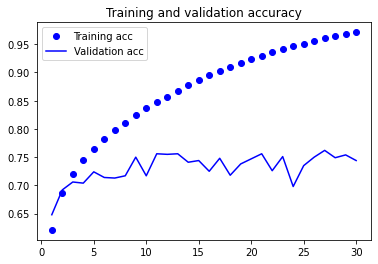

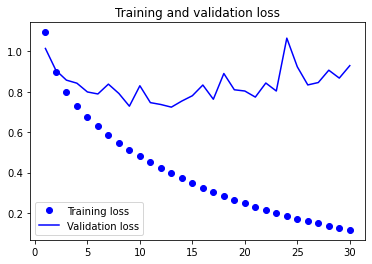

313/313 [==============================] - 11s 34ms/step - loss: 0.9345 - accuracy: 0.7401
loss = 0.9345357418060303, accuracy = 0.7401000261306763


In [73]:
# 第二次训练
# 从顶层开始解冻直到'block5_conv1'
conv_base.trainable = True       ## 解冻卷积基
set_trainable = False            ## 逻辑变量赋初值
# 循环从block1_conv1开始，直到block5_conv1将set_trainable 设为true，此后各层均layer.trainable = True
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True   ## 设置该层解冻
    else:
        layer.trainable = False  ## 设置该层冻结
# 编译和训练全连接分类器
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=30, batch_size=256, validation_data=(x_val, y_val))
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss = {}, accuracy = {}'.format(test_loss, test_acc))
#出现了一定的过拟合现象

In [74]:
# 在测试集上评估模型性能
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss = {}, accuracy = {}'.format(test_loss, test_acc))

#loss = 0.9345357418060303, accuracy = 0.7401000261306763

313/313 [==============================] - 10s 31ms/step - loss: 0.9345 - accuracy: 0.7401
loss = 0.9345357418060303, accuracy = 0.7401000261306763
